In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import keras
import keras.backend as K
from keras.layers.core import Activation
from keras.layers import Dense , LSTM, Dropout
from keras.models import Sequential, load_model
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm

Restrictions removal for pd , optional , not recommended for rows(10k+) 

In [ ]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
fd_001_train = pd.read_csv(('/content/drive/MyDrive/Colab Notebooks/data_degrad/train_FD001.txt'),sep=" ",header=None)
fd_001_test = pd.read_csv(('/content/drive/MyDrive/Colab Notebooks/data_degrad/test_FD001.txt'),sep=" ",header=None)
#fd_001_test.describe()
fd_001_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [ ]:
fd_001_train.drop(columns=[26,27],inplace=True)
fd_001_test.drop(columns=[26,27],inplace=True)
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

In [ ]:
fd_001_train.columns = columns
fd_001_test.columns = columns

In [ ]:
fd_001_test.describe

In [ ]:
fd_001_train.describe()

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [ ]:
fd_001_train.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)
fd_001_train.describe

<bound method NDFrame.describe of        unit_number  time_in_cycles  setting_1  setting_2     T24      T30  \
0                1               1    -0.0007    -0.0004  641.82  1589.70   
1                1               2     0.0019    -0.0003  642.15  1591.82   
2                1               3    -0.0043     0.0003  642.35  1587.99   
3                1               4     0.0007     0.0000  642.35  1582.79   
4                1               5    -0.0019    -0.0002  642.37  1582.85   
...            ...             ...        ...        ...     ...      ...   
20626          100             196    -0.0004    -0.0003  643.49  1597.98   
20627          100             197    -0.0016    -0.0005  643.54  1604.50   
20628          100             198     0.0004     0.0000  643.42  1602.46   
20629          100             199    -0.0011     0.0003  643.23  1605.26   
20630          100             200    -0.0032    -0.0005  643.85  1600.38   

           T50    P15     P30       Nf   

In [ ]:
def prepare_train_data(data, factor = 0):
    df = data.copy()
    fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    fd_RUL = pd.DataFrame(fd_RUL)
    fd_RUL.columns = ['unit_number','max']
    df = df.merge(fd_RUL, on=['unit_number'], how='left')
    df['RUL'] = df['max'] - df['time_in_cycles']
    df.drop(columns=['max'],inplace = True)
    
    return df[df['time_in_cycles'] > factor]

In [ ]:
df = prepare_train_data(fd_001_train)

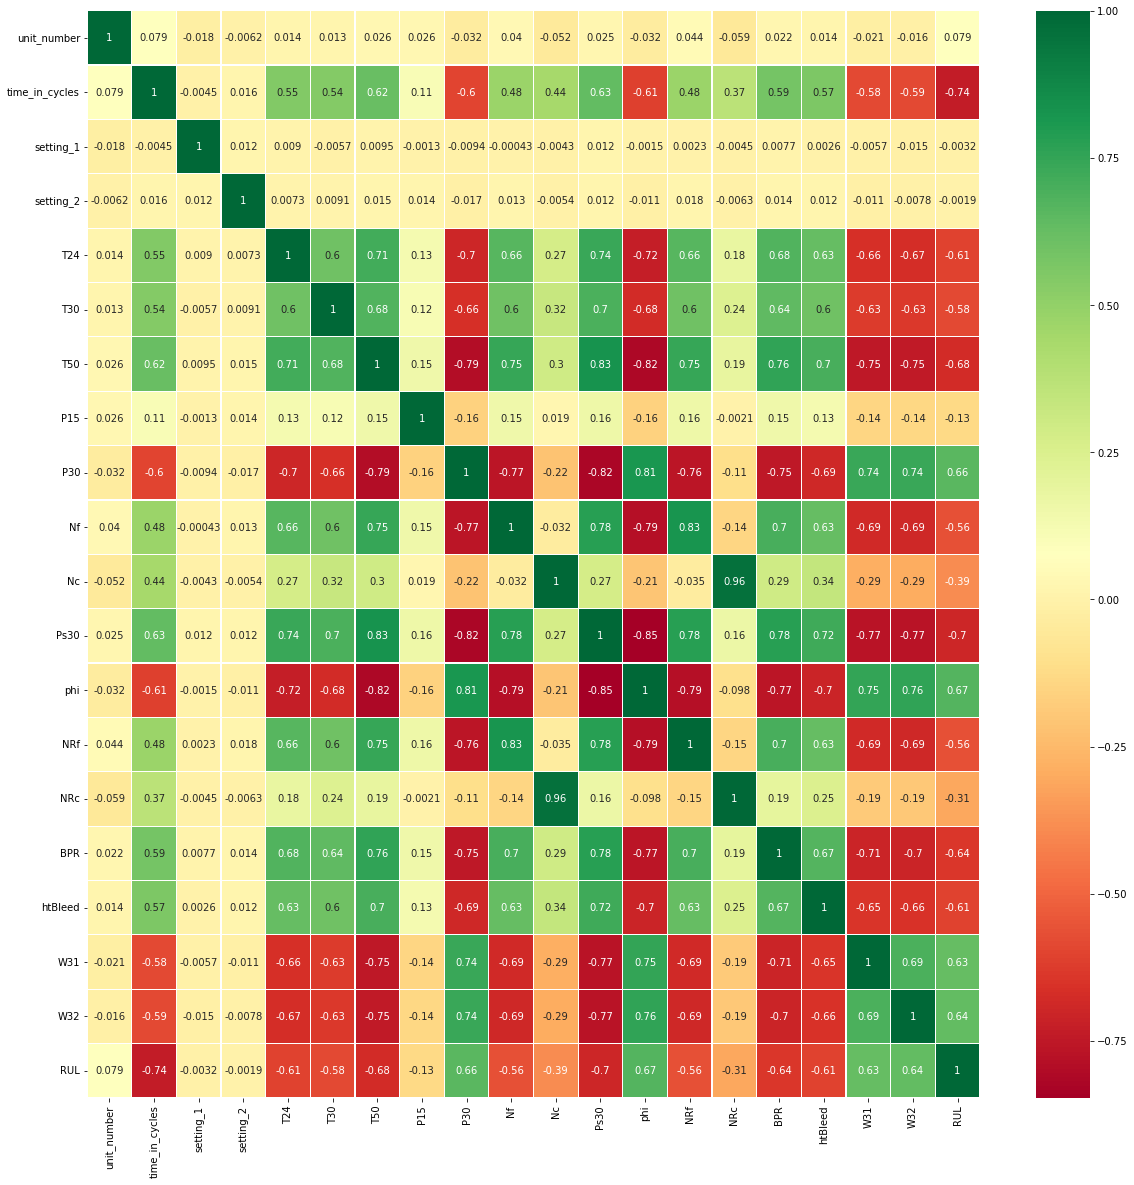

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [8]:
def score(y_true,y_pred):
    score = 0
    d = y_pred - y_true
    for i in d:
      score += abs(i)   
    return score
  

def score_func(y_true,y_pred):
    lst = [round(score(y_true,y_pred),2), 
          round(mean_absolute_error(y_true,y_pred),2),
          round(mean_squared_error(y_true,y_pred),2)**0.5,
          round(r2_score(y_true,y_pred),2)]

    print(f' compatitive score {lst[0]}')
    print(f' mean absolute error {lst[1]}')
    print(f' root mean squared error {lst[2]}')
    print(f' R2 score {lst[3]}')
    return [lst[1], round(lst[2],2), lst[3]*100]


In [ ]:
unit_number = pd.DataFrame(df["unit_number"])
train_df = df.drop(columns = ['unit_number','setting_1','setting_2','P15','NRc'])

In [ ]:
train_df.head()

,time_in_cycles,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,BPR,htBleed,W31,W32,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


Model for learning on RUL , addition of long short-term memory

In [7]:
def lstm_data_preprocessing(raw_train_data, raw_test_data, raw_RUL_data):
    train_df = raw_train_data
    truth_df = raw_RUL_data
    truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
    
    # we will only make use of "label1" for binary classification, 
    # while trying to answer the question: is a specific engine going to fail within w1 cycles
    w1 = 30
    w0 = 15
    train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
    train_df['label2'] = train_df['label1']
    train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
    
    # MinMax normalization (from 0 to 1)
    train_df['cycle_norm'] = train_df['time_in_cycles']
    cols_normalize = train_df.columns.difference(['unit_number','time_in_cycles','RUL','label1','label2']) #  except [id , cycle, rul]

    min_max_scaler = MinMaxScaler()

    norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                                 columns=cols_normalize, 
                                 index=train_df.index)

    join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
    train_df = join_df.reindex(columns = train_df.columns)
    print("train_df >> ",train_df.head())
    print("\n")
   
    #raw_test_data.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)
    test_df = raw_test_data.drop(columns = ['setting_1','setting_2','P15','NRc','max'])
    
    # MinMax normalization (from 0 to 1)
    test_df['cycle_norm'] = test_df['time_in_cycles']
    norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                                columns=cols_normalize, 
                                index=test_df.index)
    test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
    test_df = test_join_df.reindex(columns = test_df.columns)
    test_df = test_df.reset_index(drop=True)
    
    # We use the ground truth dataset to generate labels for the test data
    # generate column max for test data
    rul = pd.DataFrame(test_df.groupby('unit_number')['time_in_cycles'].max()).reset_index()
    rul.columns = ['unit_number','max']
    truth_df.columns = ['more']
    truth_df['unit_number'] = truth_df.index + 1
    truth_df['max'] = rul['max'] + truth_df['more'] # adding true-rul vlaue + max cycle of test data set w.r.t MID
    truth_df.drop('more', axis=1, inplace=True)

    # generate RUL for test data
    test_df = test_df.merge(truth_df, on=['unit_number'], how='left')
    test_df['RUL'] = test_df['max'] - test_df['time_in_cycles']
    test_df.drop('max', axis=1, inplace=True) 

    # generate label columns w0 and w1 for test data
    test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
    test_df['label2'] = test_df['label1']
    test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
    print("test_df >> ", test_df.head())

    
    ## pick a large window size of 50 cycles
    sequence_length = 50

    # function to reshape features into (samples, time steps, features) 
    def gen_sequence(id_df, seq_length, seq_cols):
        """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
        we need to drop those which are below the window-length. An alternative would be to pad sequences so that
        we can use shorter ones """
        # for one id I put all the rows in a single matrix
        data_matrix = id_df[seq_cols].values
        num_elements = data_matrix.shape[0]
        # Iterate over two lists in parallel.
        # For example id1 have 192 rows and sequence_length is equal to 50
        # so zip iterate over two following list of numbers (0,112),(50,192)
        # 0 50 -> from row 0 to row 50
        # 1 51 -> from row 1 to row 51
        # 2 52 -> from row 2 to row 52
        for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
            yield data_matrix[start:stop, :]

    # pick the feature columns 
    sequence_cols = list(test_df.columns[:-3])

    print(sequence_cols)

    val=list(gen_sequence(train_df[train_df['unit_number']==1], sequence_length, sequence_cols))
    print(len(val))

    # generator for the sequences
    # transform each id of the train dataset in a sequence
    seq_gen = (list(gen_sequence(train_df[train_df['unit_number']==id], sequence_length, sequence_cols)) 
               for id in train_df['unit_number'].unique())

    # generate sequences and convert to numpy array
    seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
    print(seq_array.shape)

    # function to generate labels
    def gen_labels(id_df, seq_length, label):
        """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
        we need to drop those which are below the window-length. An alternative would be to pad sequences so that
        we can use shorter ones """
        #Labels:
        # [[1]
        # [4]
        # [1]
        # [5]
        # [9]
        # ...
        # [200]] 
        data_matrix = id_df[label].values
        num_elements = data_matrix.shape[0]
        # I have to remove the first seq_length labels
        # because for one id the first sequence of seq_length size have as target
        # the last label (the previus ones are discarded)
        # All the next id's sequences will have associated step by step one label as target
        return data_matrix[seq_length:num_elements, :]

    # generate labels
    label_gen = [gen_labels(train_df[train_df['unit_number']==id], sequence_length, ['RUL']) 
                 for id in train_df['unit_number'].unique()]

    label_array = np.concatenate(label_gen).astype(np.float32)
    print(label_array.shape)
    print(label_array)
    
    return seq_array, label_array, test_df, sequence_length, sequence_cols

In [ ]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def lstm_train(seq_array, label_array, sequence_length):
    # The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units
    # Dropout is also applied after each LSTM layer to control overfitting
    # Final layer is a Dense output layer with single unit and linear activation since this is a regression problem
    nb_features = seq_array.shape[2]
    nb_out = label_array.shape[1]

    model = Sequential()
    model.add(LSTM(
             input_shape=(sequence_length, nb_features),
             units=100,
             return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(
              units=50,
              return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=nb_out))
    model.add(Activation("linear"))
    model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=['mae',r2_keras])

    print(model.summary())

    # fit the network
    # Commoly used 100 epoches but 50-60 are fine 
    history = model.fit(seq_array, label_array, epochs=60, batch_size=200, validation_split=0.05, verbose=2)
    # list all data in history
    print(history.history.keys())
    
    return model, history

In [ ]:
def lstm_test_evaluation_graphs(model, history, seq_array, label_array):
    # summarize history for R^2
    fig_acc = plt.figure(figsize=(10, 10))
    plt.plot(history.history['r2_keras'])
    plt.plot(history.history['val_r2_keras'])
    plt.title('model r^2')
    plt.ylabel('R^2')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # fig_acc.savefig("model_r2.png")

    # summarize history for MAE
    fig_acc = plt.figure(figsize=(10, 10))
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('model MAE')
    plt.ylabel('MAE')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # fig_acc.savefig("model_mae.png")

    # summarize history for Loss
    fig_acc = plt.figure(figsize=(10, 10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # fig_acc.savefig("model_regression_loss.png")

    # training metrics
    scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
    print('\nMAE: {}'.format(scores[1]))
    print('\nR^2: {}'.format(scores[2]))

    y_pred = model.predict(seq_array,verbose=1, batch_size=200)
    y_true = label_array

    test_set = pd.DataFrame(y_pred )
    test_set.head()
    # test_set.to_csv('submit_train.csv', index = None)

In [ ]:
def lstm_valid_evaluation(lstm_test_df, model, sequence_length, sequence_cols):
    # We pick the last sequence for each id in the test data
    seq_array_test_last = [lstm_test_df[lstm_test_df['unit_number']==id][sequence_cols].values[-sequence_length:] 
                           for id in lstm_test_df['unit_number'].unique() if len(lstm_test_df[lstm_test_df['unit_number']==id]) >= sequence_length]

    seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)

    # Similarly, we pick the labels
    y_mask = [len(lstm_test_df[lstm_test_df['unit_number']==id]) >= sequence_length for id in lstm_test_df['unit_number'].unique()]
    label_array_test_last = lstm_test_df.groupby('unit_number')['RUL'].nth(-1)[y_mask].values
    label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)

    estimator = model

    # test metrics
    scores_test = estimator.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
    print('\nMAE: {}'.format(scores_test[1]))
    print('\nR^2: {}'.format(scores_test[2]))

    y_pred_test = estimator.predict(seq_array_test_last)
    y_true_test = label_array_test_last

    test_set = pd.DataFrame(y_pred_test)
    print(test_set.head())

    # Plot in blue color the predicted data and in green color the
    # actual data to verify visually the accuracy of the model
    fig_verify = plt.figure(figsize=(10, 5))
    plt.plot(y_pred_test)
    plt.plot(y_true_test, color="orange")
    plt.title('prediction')
    plt.ylabel('value')
    plt.xlabel('row')
    plt.legend(['predicted', 'actual data'], loc='upper left')
    plt.show()
    # fig_verify.savefig("model_regression_verify.png")
    return scores_test[1], scores_test[2]

In [ ]:
#function for creating and training models using the "Random forest" and "XGBoost" algorithms
def train_models(data,model = 'FOREST'):
    
    if model != 'LSTM':
        X = data.iloc[:,:14].to_numpy() 
        Y = data.iloc[:,14:].to_numpy()
        Y = np.ravel(Y)

    if model == 'FOREST':
         #  parameters for models are selected in a similar cycle, with the introduction 
         # of an additional param parameter into the function:
         #for i in range(1,11):
         #     xgb = train_models(train_df,param=i,model="XGB",)
         #     y_xgb_i_pred = xgb.predict(X_001_test)
         #     print(f'param = {i}')
         #     score_func(y_true,y_xgb_i_pred)
        model = RandomForestRegressor(n_estimators=70, max_features=7, max_depth=5, n_jobs=-1, random_state=1)
        model.fit(X,Y)
        return model
    
    elif model == 'XGB':
        model = xgboost.XGBRegressor(n_estimators=110, learning_rate=0.018, gamma=0, subsample=0.8,
                           colsample_bytree=0.5, max_depth=3,silent=True)
        model.fit(X,Y)
        return model
    
    elif model == 'LSTM':
        seq_array, label_array, lstm_test_df, sequence_length, sequence_cols = lstm_data_preprocessing(data[0], data[1], data[2])
        model_instance, history = lstm_train(seq_array, label_array, sequence_length)
        return model_instance, history, lstm_test_df, seq_array, label_array, sequence_length, sequence_cols
            
    return

In [ ]:

def plot_result(y_true,y_pred):
    rcParams['figure.figsize'] = 12,10
    plt.plot(y_pred)
    plt.plot(y_true)
    plt.tick_params(axis='x', which='both', bottom=False, top=False,labelbottom=False)
    plt.ylabel('RUL')
    plt.xlabel('training samples')
    plt.legend(('Predicted', 'True'), loc='upper right')
    plt.title('COMPARISION OF Real and Predicted values')
    plt.show()
    return

In [ ]:
fd_001_test.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)
test_max = fd_001_test.groupby('unit_number')['time_in_cycles'].max().reset_index()
test_max.columns = ['unit_number','max']
fd_001_test = fd_001_test.merge(test_max, on=['unit_number'], how='left')
test = fd_001_test[fd_001_test['time_in_cycles'] == fd_001_test['max']].reset_index()
test.drop(columns=['index','max','unit_number','setting_1','setting_2','P15','NRc'],inplace = True)
X_001_test = test.to_numpy()
X_001_test.shape
fd_001_test.head()

,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,max
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,31
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,31
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,31
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,31
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,31


In [ ]:
#test_df=fd_001_test
#test_df.drop(columns = ['unit_number','setting_1','setting_2','P15','NRc'])
#test_df.to_csv('test_frame.csv')
#test_df.describe

In [ ]:
train_df.describe

<bound method NDFrame.describe of        time_in_cycles     T24      T30      T50     P30       Nf       Nc  \
0                   1  641.82  1589.70  1400.60  554.36  2388.06  9046.19   
1                   2  642.15  1591.82  1403.14  553.75  2388.04  9044.07   
2                   3  642.35  1587.99  1404.20  554.26  2388.08  9052.94   
3                   4  642.35  1582.79  1401.87  554.45  2388.11  9049.48   
4                   5  642.37  1582.85  1406.22  554.00  2388.06  9055.15   
...               ...     ...      ...      ...     ...      ...      ...   
20626             196  643.49  1597.98  1428.63  551.43  2388.19  9065.52   
20627             197  643.54  1604.50  1433.58  550.86  2388.23  9065.11   
20628             198  643.42  1602.46  1428.18  550.94  2388.24  9065.90   
20629             199  643.23  1605.26  1426.53  550.68  2388.25  9073.72   
20630             200  643.85  1600.38  1432.14  550.79  2388.26  9061.48   

        Ps30     phi      NRf     BPR  ht

In [ ]:
train_df.to_csv('TW_A.csv')

In [ ]:
model_1 = train_models(train_df)
y_pred = model_1.predict(X_001_test)
RUL = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_degrad/RUL_FD001.txt",sep=" ",header=None)
y_true = RUL[0].to_numpy()
RUL.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [ ]:
RF_individual_scorelst = score_func(y_true, y_pred)

 compatitive score 1057.2
 mean absolute error 19.25
 root mean squared error 24.45219826518671
 R2 score 0.65


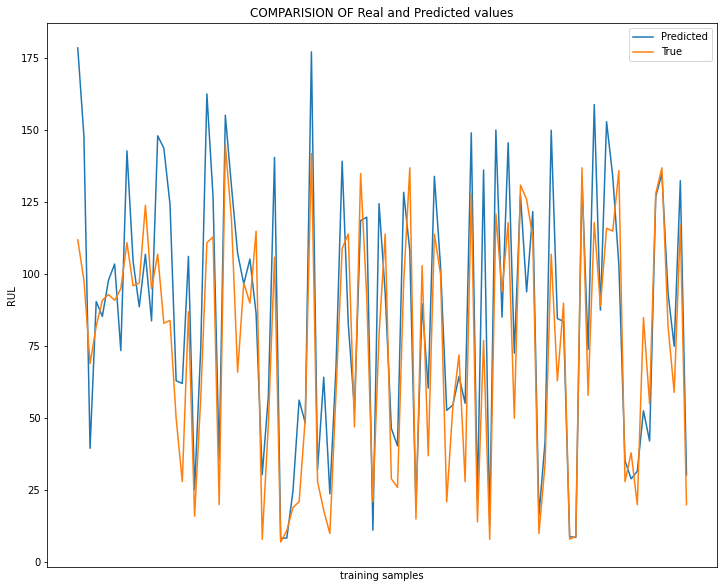

In [ ]:
plot_result(y_true,y_pred)

In [ ]:
fd_001_test.head

<bound method NDFrame.head of        unit_number  time_in_cycles  setting_1  setting_2     T24      T30  \
0                1               1     0.0023     0.0003  643.02  1585.29   
1                1               2    -0.0027    -0.0003  641.71  1588.45   
2                1               3     0.0003     0.0001  642.46  1586.94   
3                1               4     0.0042     0.0000  642.44  1584.12   
4                1               5     0.0014     0.0000  642.51  1587.19   
...            ...             ...        ...        ...     ...      ...   
13091          100             194     0.0049     0.0000  643.24  1599.45   
13092          100             195    -0.0011    -0.0001  643.22  1595.69   
13093          100             196    -0.0006    -0.0003  643.44  1593.15   
13094          100             197    -0.0038     0.0001  643.26  1594.99   
13095          100             198     0.0013     0.0003  642.95  1601.62   

           T50    P15     P30       Nf       

In [ ]:
train_df_lstm = pd.concat([unit_number, train_df], axis=1)
model, history, lstm_test_df, seq_array, label_array, sequence_length, sequence_cols = train_models([train_df_lstm, fd_001_test, RUL.copy()], "LSTM")

train_df >>     unit_number  time_in_cycles       T24       T30       T50       P30  \
0            1               1  0.183735  0.406802  0.309757  0.726248   
1            1               2  0.283133  0.453019  0.352633  0.628019   
2            1               3  0.343373  0.369523  0.370527  0.710145   
3            1               4  0.343373  0.256159  0.331195  0.740741   
4            1               5  0.349398  0.257467  0.404625  0.668277   

         Nf        Nc      Ps30       phi       NRf       BPR   htBleed  \
0  0.242424  0.109755  0.369048  0.633262  0.205882  0.363986  0.333333   
1  0.212121  0.100242  0.380952  0.765458  0.279412  0.411312  0.333333   
2  0.272727  0.140043  0.250000  0.795309  0.220588  0.357445  0.166667   
3  0.318182  0.124518  0.166667  0.889126  0.294118  0.166603  0.333333   
4  0.242424  0.149960  0.255952  0.746269  0.235294  0.402078  0.416667   

        W31       W32  RUL  label1  label2  cycle_norm  
0  0.713178  0.724662  191       0

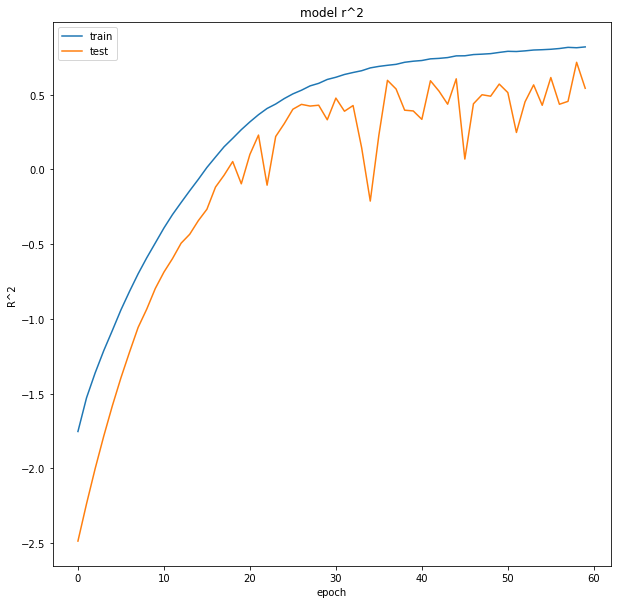

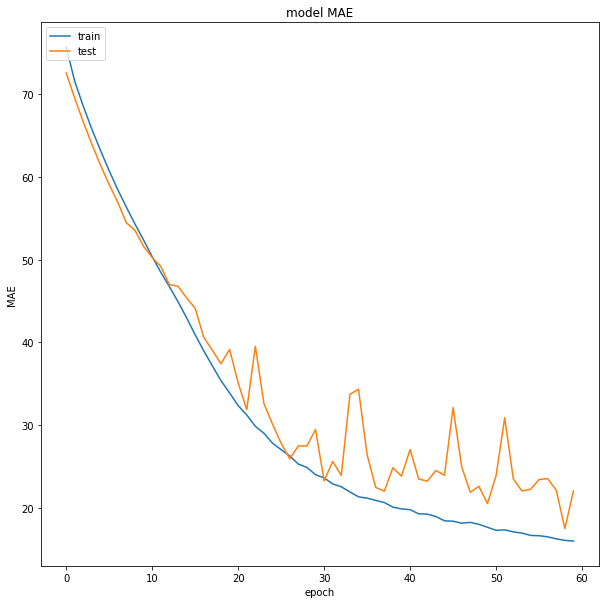

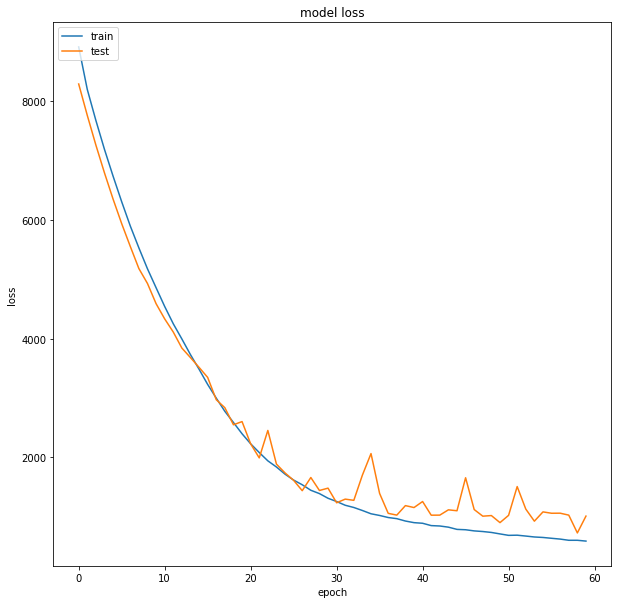

79/79 [==============================] - 7s 84ms/step - loss: 491.2190 - mae: 13.3463 - r2_keras: 0.8370

MAE: 13.346275329589844

R^2: 0.8370246291160583
79/79 [==============================] - 7s 83ms/step


In [ ]:
lstm_test_evaluation_graphs(model, history, seq_array, label_array)

3/3 - 0s - loss: 560.8349 - mae: 16.5611 - r2_keras: 0.6683

MAE: 16.56110954284668

R^2: 0.668283224105835
            0
0   48.555294
1   65.750916
2   74.838669
3   81.316719
4  102.321342


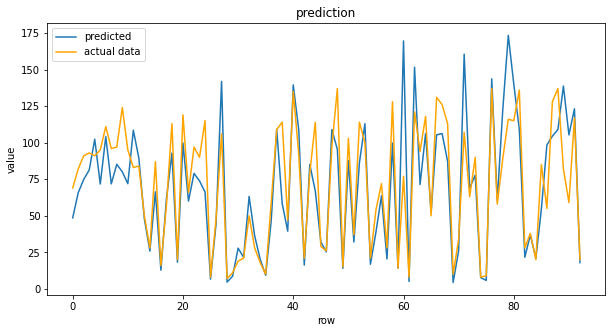

In [ ]:
MAE, R2 = lstm_valid_evaluation(lstm_test_df, model, sequence_length, sequence_cols)
# mae, rmse, r2
LSTM_individual_scorelst = [round(MAE,2), 0, round(R2,2)*100]

In [ ]:
def single_train(test_data,train_data,algorithm):
    y_single_pred = []
    for sample in tqdm(test_data):
        time.sleep(0.01)
        single_train_df = prepare_train_data(train_data, factor = sample[0])
        single_train_df.drop(columns = ['unit_number','setting_1','setting_2','P15','NRc'],inplace = True)
        model = train_models(single_train_df,algorithm)
        y_p = model.predict(sample.reshape(1,-1))[0]
        y_single_pred.append(y_p)
    y_single_pred = np.array(y_single_pred)
    return y_single_pred

In [ ]:
y_single_pred = single_train(X_001_test,fd_001_train,'FOREST')

100%|██████████| 100/100 [01:34<00:00,  1.06it/s]


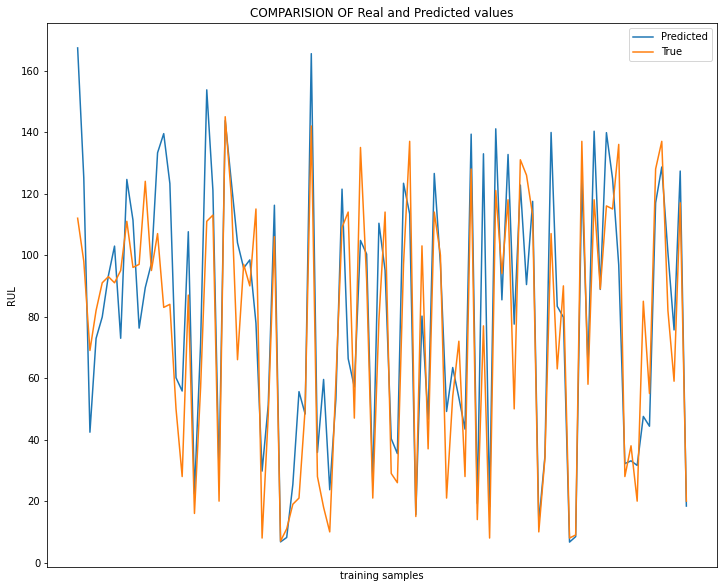

In [ ]:
plot_result(y_true,y_single_pred)

In [ ]:
RF_SingleTrain_scorelst = score_func(y_true, y_single_pred)
def prepare_test_data(fd_001_test,n=0):
    test = fd_001_test[fd_001_test['time_in_cycles'] == fd_001_test['max'] - n].reset_index()
    test.drop(columns=['index','max','unit_number','setting_1','setting_2','P15','NRc'],inplace = True)
    X_return = test.to_numpy()
    return X_return

 compatitive score 868.02
 mean absolute error 16.49
 root mean squared error 21.342445970413046
 R2 score 0.74


In [ ]:
N=5
y_n_pred = y_single_pred
for i in range(1,N):
    X_001_test = prepare_test_data(fd_001_test,i)
    y_single_i_pred = single_train(X_001_test,fd_001_train,'FOREST')    
    y_n_pred = np.vstack((y_n_pred,y_single_i_pred))  

 compatitive score 810.53
 mean absolute error 17.78
 root mean squared error 22.172505496673125
 R2 score 0.72


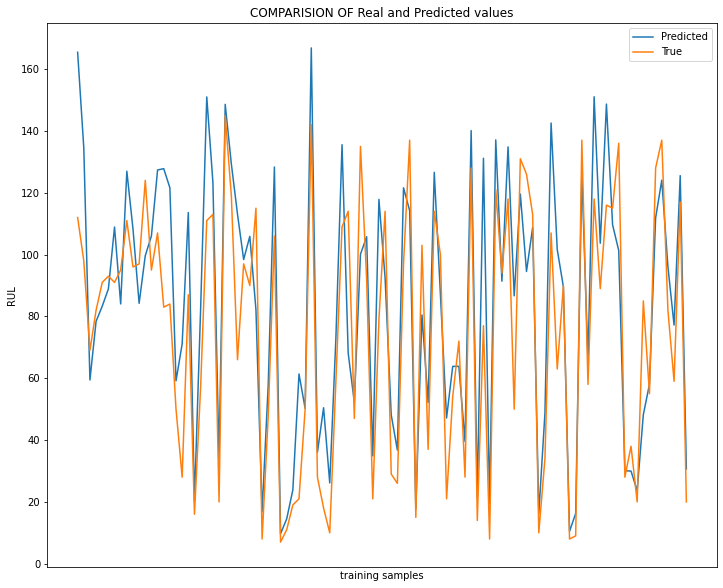

In [ ]:
y_multi_pred = np.mean(y_n_pred,axis = 0)
RF_5avg_scorelst = score_func(y_true,y_multi_pred)
plot_result(y_true,y_multi_pred)

 82%|████████▏ | 82/100 [01:20<00:14,  1.24it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
  4%|▍         | 4/100 [00:05<02:04,  1.29s/it]/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


 compatitive score 990.42
 mean absolute error 20.55
 root mean squared error 24.55605831561735
 R2 score 0.65


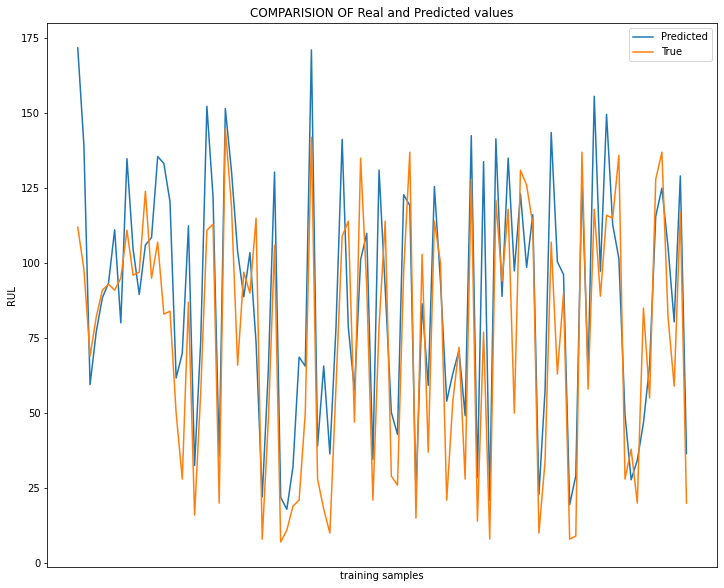

In [ ]:
N=10
# In order not to recalculate the average result for 5 predictions, the stored value y_multi_pred
# is entered in y_n_pred, then the predictions for 5,6,7 .... lines from the last for the given engine
y_n_pred = y_multi_pred
for i in range(5,N):
    X_001_test = prepare_test_data(fd_001_test,i)
    y_single_i_pred = single_train(X_001_test,fd_001_train,'FOREST')    
    y_n_pred = np.vstack((y_n_pred,y_single_i_pred)) 
     
y_multi_pred_10 = np.mean(y_n_pred,axis = 0)
score_func(y_true,y_multi_pred_10)
plot_result(y_true,y_multi_pred_10)

 compatitive score 1140.49
 mean absolute error 20.39
 root mean squared error 24.557483584439186
 R2 score 0.65


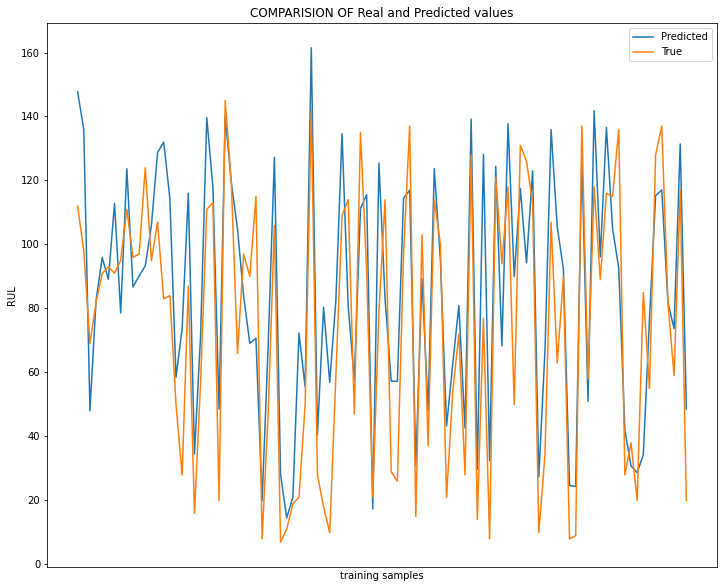

 42%|████▏     | 42/100 [00:25<00:33,  1.75it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
100%|██████████| 100/100 [00:57<00:00,  1.74it/s]


 compatitive score 1139.26
 mean absolute error 18.9
 root mean squared error 22.63294059551255
 R2 score 0.7


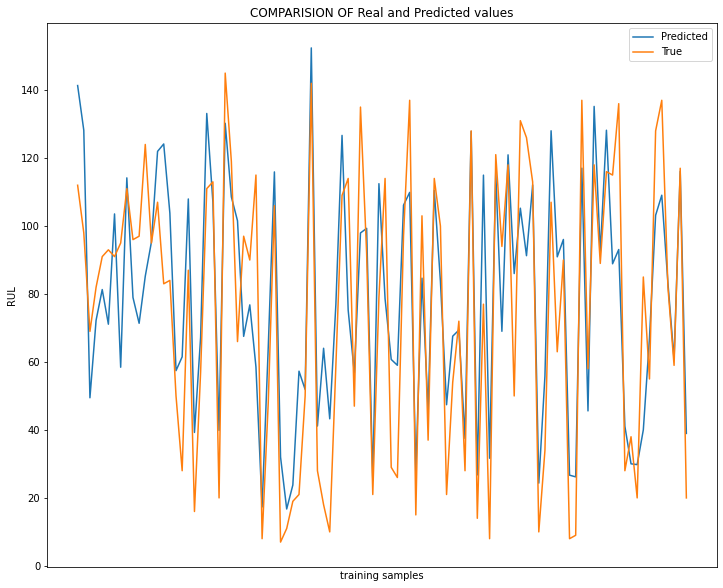

In [ ]:
xgb = train_models(train_df,model="XGB")
y_xgb_pred = xgb.predict(X_001_test)
XGB_individual_scorelst = score_func(y_true,y_xgb_pred)
plot_result(y_true,y_xgb_pred)
y_single_xgb_pred = single_train(X_001_test,fd_001_train,'XGB')
XGB_SingleTrain_scorelst = score_func(y_true,y_single_xgb_pred)
plot_result(y_true,y_single_xgb_pred)

 80%|████████  | 80/100 [00:43<00:11,  1.73it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


 compatitive score 1136.65
 mean absolute error 16.14
 root mean squared error 20.620135790047552
 R2 score 0.75


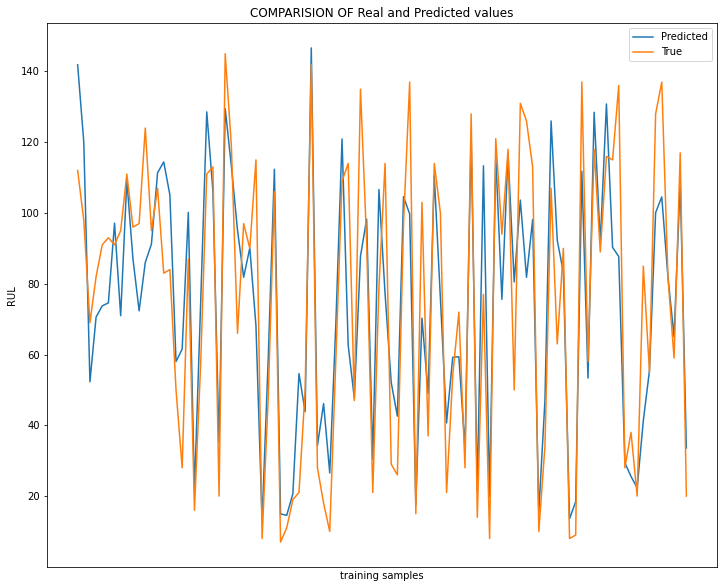

In [ ]:
N=5
y_n_pred = y_single_xgb_pred
for i in range(1,N):
    X_001_test = prepare_test_data(fd_001_test,i)
    y_single_i_pred = single_train(X_001_test,fd_001_train,'XGB')    
    y_n_pred = np.vstack((y_n_pred,y_single_i_pred)) 

y_5_pred_xgb = np.mean(y_n_pred,axis = 0)
XGB_5avg_scorelst = score_func(y_true,y_5_pred_xgb)
plot_result(y_true,y_5_pred_xgb)

  Parameters        Models  Scores
0        mae    RFRegrssor   19.25
1       rmse    RFRegrssor   24.45
2         r2    RFRegrssor   65.00
3        mae          LSTM   16.56
4       rmse          LSTM    0.00
5         r2          LSTM   67.00
6        mae  XGBRegressor   20.39
7       rmse  XGBRegressor   24.56
8         r2  XGBRegressor   65.00


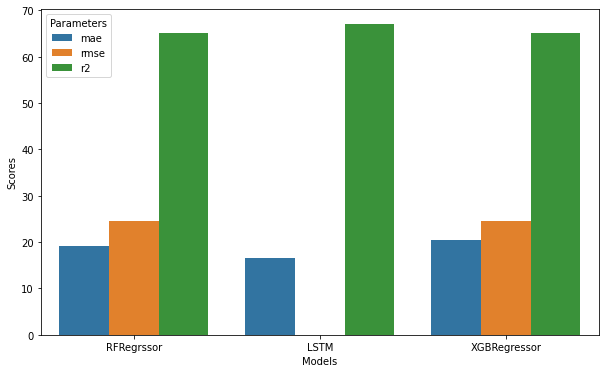

In [ ]:
# Bar plots for comparision
def Bar_Plots(RF_score_lst, XGB_score_lst, LSTM_score_lst=0):
    hue = ["mae","rmse", "r2"] 
    if LSTM_score_lst != 0: 
        df = pd.DataFrame(zip(hue*3, ["RFRegrssor"]*3+["LSTM"]*3+["XGBRegressor"]*3, RF_score_lst+LSTM_score_lst+XGB_score_lst), columns=["Parameters", "Models", "Scores"])
    else:
        df = pd.DataFrame(zip(hue*3, ["RFRegrssor"]*3+["XGBRegressor"]*3, RF_score_lst+XGB_score_lst), columns=["Parameters", "Models", "Scores"])
    print(df.head(10))
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Models", y="Scores", hue="Parameters", data=df)
    plt.show()
Bar_Plots(RF_individual_scorelst, XGB_individual_scorelst, LSTM_individual_scorelst)

  Parameters        Models  Scores
0        mae    RFRegrssor   17.78
1       rmse    RFRegrssor   22.17
2         r2    RFRegrssor   72.00
3        mae  XGBRegressor   16.14
4       rmse  XGBRegressor   20.62
5         r2  XGBRegressor   75.00


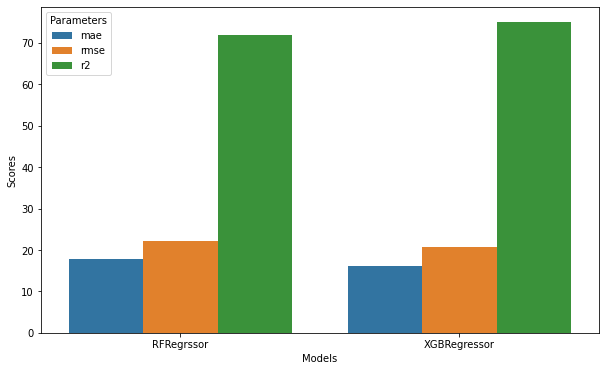

In [ ]:
Bar_Plots(RF_5avg_scorelst, XGB_5avg_scorelst)